In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
n = 200
X, y = make_moons(n_samples=n, noise=0.1, random_state=42)
y = 2*y-1
X = X - np.mean(X,axis=0)

In [ ]:
#                   red                  or    blue
mycolormap = list(["#D81B60" if y[i] > 0 else "#1E88E5" for i in range(len(y)) ])
def plot_data_scatter(i = None, ax=None):
    if ax is None:
        ax = plt.gca()
    if i is None:
        plt.scatter(X[:, 0], X[:, 1], c=mycolormap, s=50)
    else:

        plt.scatter(X[i, 0], X[i, 1], c='k', s=300)
        plt.scatter(X[i, 0], X[i, 1], c=mycolormap[i], s=250)

def plot_decision_boundary(w, ax=None):
    if ax is None:
        ax = plt.gca()

    xlim = ax.get_xlim() # Store the scatter plot's limits and restore them
    ylim = ax.get_ylim()

    x_vals = np.linspace(xlim[0], xlim[1], 100)
    y_vals = -(w[0] / w[1]) * x_vals  # Solve for x2 from the linear equation

    ax.plot(x_vals, y_vals, 'r--')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

def plot_normal_vector(w, ax=None):
    if ax is None:
        ax = plt.gca()
    v = w/np.sqrt(np.sum(w**2))

    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='#D81B60', linewidth=2)
    ax.quiver(0, 0, -v[0], -v[1], angles='xy', scale_units='xy', scale=1, color='#1E88E5', linewidth=2)


In [ ]:
w = np.random.randn(2)

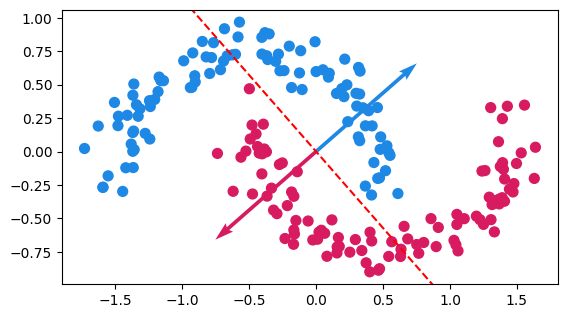

In [ ]:
plot_data_scatter()
plot_decision_boundary(w)
plot_normal_vector(w)
plt.gca().set_aspect('equal')

# Single update

In [ ]:
i = 0

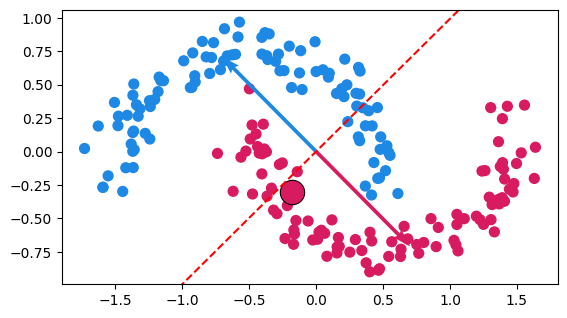

In [ ]:
if y[i]*np.dot(w,X[i,:]) > 0:
    pass
else:
    w = w + y[i]*X[i,:]
plot_data_scatter()
plot_data_scatter(i)
plot_decision_boundary(w)
plot_normal_vector(w)
plt.gca().set_aspect('equal')
i += 1

In [ ]:
w

array([0., 0.])

In [ ]:
def forward(X,w):

    z = np.dot(X, w)

    return z

def compute_risk(y, z):
    return np.mean(np.maximum(0,-(y * z)))

def compute_misclf(y,yhat):
    return np.mean(y*yhat<0)

Try `eta = 1, reuns = 3` first, then
Try `eta = 0.01, reuns = 10` first.

In [ ]:
np.random.seed(137)
w = np.random.randn(2)
w_list = [w]
z = forward(X,w)
training_risk_list = [compute_risk(y,z)]
yhat = np.sign(z)
training_msclf_list = [compute_misclf(y,yhat)]
eta = 0.1
reruns = 10

training_msclf_best = 1
w_best = None

for i in range(reruns*n):
    idx = i%n
    if y[idx]*np.dot(w,X[idx,:]) <= 0:
        w = w + eta* y[idx]*X[idx,:]
    z = forward(X,w)
    yhat = np.sign(z)

    training_risk_list.append(compute_risk(y,z))
    training_msclf = compute_misclf(y,yhat)
    if training_msclf_best >= training_msclf:
        w_best = w
        training_msclf_best = training_msclf
    training_msclf_list.append(training_msclf)
    w_list.append(w)


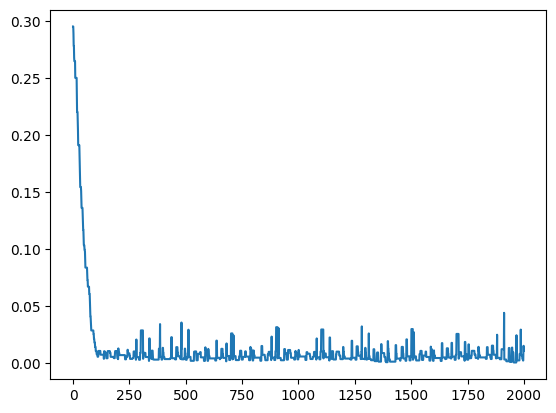

In [ ]:
plt.plot(training_risk_list)

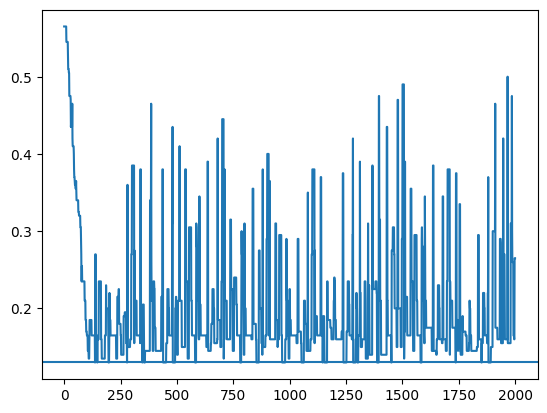

In [ ]:
plt.plot(training_msclf_list)
plt.axhline(training_msclf_best)

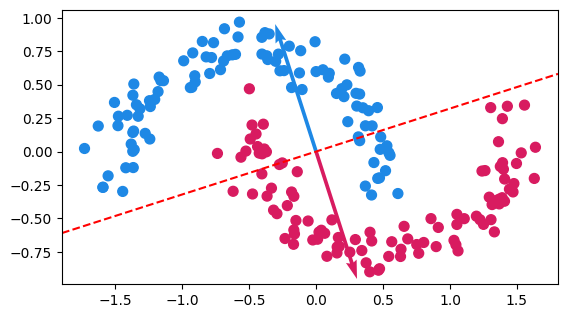

In [ ]:
w = w_best
plot_data_scatter()
plot_decision_boundary(w)
plot_normal_vector(w)
plt.gca().set_aspect('equal')

In [ ]:
np.random.seed(137)
w = np.random.randn(2)
w_list = [w]
z = forward(X,w)
training_risk_list = [compute_risk(y,z)]
yhat = np.sign(z)
training_msclf_list = [compute_misclf(y,yhat)]
eta = 0.1
reruns = 10

for i in range(reruns*n):
    idx = i%n
    w = w + eta * (np.dot(y*((y*np.dot(X,w))<=0), X))/n
    z = forward(X,w)
    yhat = np.sign(z)

    training_risk_list.append(compute_risk(y,z))
    training_msclf_list.append(compute_misclf(y,yhat))
    w_list.append(w)


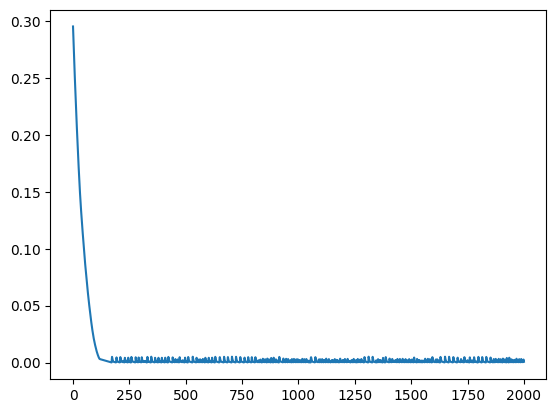

In [ ]:
plt.plot(training_risk_list)

Text(0.5, 1.0, '0.235')

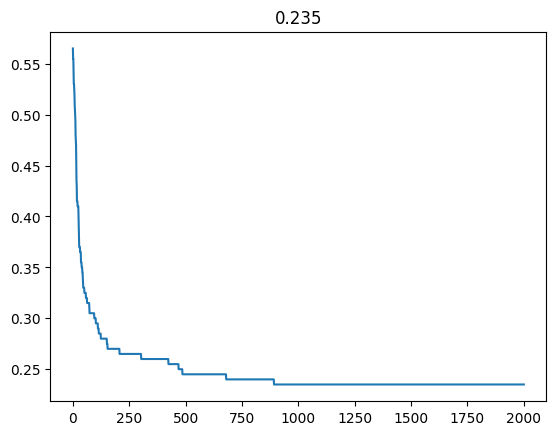

In [ ]:
plt.plot(training_msclf_list)
plt.title(training_msclf_list[-1])

In [ ]:
np.random.seed(137)
w = np.random.randn(2)
w_list = [w]
z = forward(X,w)
training_risk_list = [compute_risk(y,z)]
yhat = np.sign(z)
training_msclf_list = [compute_misclf(y,yhat)]
eta = 0.1
reruns = 20

for i in range(reruns*n):
    w = # your code here

    z = forward(X,w)
    yhat = np.sign(z)

    training_risk_list.append(compute_risk(y,z))
    training_msclf_list.append(compute_misclf(y,yhat))
    w_list.append(w)


Text(0.5, 1.0, '0.13')

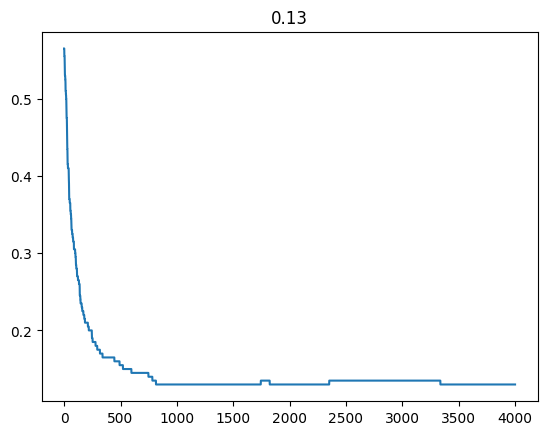

In [ ]:
plt.plot(training_msclf_list)
plt.title(training_msclf_list[-1])

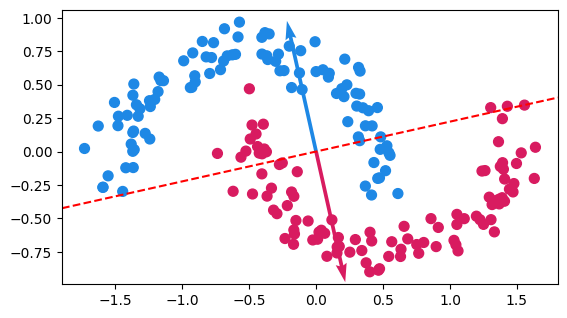

In [ ]:
w = w_list[-1]
plot_data_scatter()
plot_decision_boundary(w)
plot_normal_vector(w)
plt.gca().set_aspect('equal')